In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.ticker import FuncFormatter

In [2]:
dpi = 150
width = 1000 / dpi
height = 1000 / dpi

plt.rcParams['figure.figsize'] = (width, height)

In [3]:
def theme_custom():
    sns.set_theme(style="whitegrid")
    plt.gca().set_aspect(height / width)
    plt.rc('axes', titlesize=24, labelsize=20)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=14)

def theme_custom_ts():
    sns.set_theme(style="whitegrid")
    plt.gca().set_aspect(12 / 24)
    plt.gca().margins(0.01, 0.01)
    plt.rc('text', usetex=False)
    plt.rc('font', size=18)

def theme_custom_tiles():
    sns.set_theme(style="whitegrid")
    plt.xticks(rotation=90, ha='right', va='top', fontsize=18)
    plt.yticks(fontsize=18)
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)

In [4]:
import os

file_path = r'/home/abdr/work/Data-Analytics/GlobalTerrorismDA/globalterrorismdb_0718dist.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1') 

current_directory = os.path.dirname(os.path.abspath(file_path))
print("Current directory:", current_directory)
print("File exists:", os.path.exists(file_path))

# print(df.head())

/tmp/ipykernel_57501/2873710531.py:6: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


Current directory: /home/abdr/work/Data-Analytics/GlobalTerrorismDA
File exists: True


In [5]:
data = df[
    [
        # Time
        "iyear",           # Year
        "imonth",          # Month
        "iday",            # Day

        # Geospatial
        "latitude",        # Geo coordinate
        "longitude",       # Geo coordinate

        # Numerical
        "nperps",          # Number of perpetrators
        "nkill",           # Death toll
        "nwound",          # Number of casualties
        "nkillter",        # Death toll - terrorist only
        "propextent",      # Amount of damage done                  
        "ransomamt",       # Any ransom demanded?         

        # Binary
        "doubtterr",       # Was an act of terror?
        "vicinity",        # Did event occur in city?
        "ishostkid",       # Hostages?
        "extended",        # Duration above 24hrs?

        # Categorical
        "city",            # City        
        "country",         # Country id
        "region",          # Region id        
        "country_txt",     # Country name
        "region_txt",      # Region name  
        "attacktype1_txt", # Attack type description
        "weaptype1_txt",   # Weapon type description
        "targtype1_txt",   # Target type description

        # Text
        # "summary",      # Motive text variable (commented out like in R)
        "gname"            # Name of the organization
    ]
]

# print(data.head())

In [6]:
## Renaming

In [7]:
data = data.rename(columns={
    "iyear": "year",
    "imonth": "month",
    "iday": "day",
    "propextent": "damage",
    "latitude": "lat",
    "longitude": "long"
})

data["country"] = data["country_txt"]
data["region"] = data["region_txt"]
data["attack"] = data["attacktype1_txt"]
data["weapon"] = data["weaptype1_txt"]
data["target"] = data["targtype1_txt"]

data = data.drop(columns=["country_txt", "region_txt", "attacktype1_txt", "weaptype1_txt", "targtype1_txt"])

# output_path = './data/cleaned_globalterrorismdb.csv'
# data.to_csv(output_path, index=False)

# print(f"Data saved to {output_path}")

In [8]:
import numpy as np

data["attack"] = data["attack"].astype(str)

data["attack"] = np.where(data["attack"] == 'Facility/Infrastructure Attack', 'Infrastructure Attack', data["attack"])
data["attack"] = np.where(data["attack"] == 'Bombing/Explosion', 'Explosion', data["attack"])
data["attack"] = np.where(data["attack"] == 'Hostage Taking (Barricade Incident)', 'Hostage (Barricade)', data["attack"])
data["attack"] = np.where(data["attack"] == 'Hostage Taking (Kidnapping)', 'Hostage (Kidnapping)', data["attack"])

data["attack"] = data["attack"].astype('category')

print(data["attack"].head)

<bound method NDFrame.head of 0                 Assassination
1          Hostage (Kidnapping)
2                 Assassination
3                     Explosion
4         Infrastructure Attack
                  ...          
181686            Armed Assault
181687                Explosion
181688    Infrastructure Attack
181689                Explosion
181690                Explosion
Name: attack, Length: 181691, dtype: category
Categories (9, object): ['Armed Assault', 'Assassination', 'Explosion', 'Hijacking', ..., 'Hostage (Kidnapping)', 'Infrastructure Attack', 'Unarmed Assault', 'Unknown']>


In [9]:
data["target"] = data["target"].astype(str)

data["target"] = np.where(data["target"] == 'Government (General)', 'Government', data["target"])
data["target"] = np.where(data["target"] == 'Private Citizens & Property', 'Private', data["target"])

data["target"] = data["target"].astype('category')

print(data["target"].head())

0                    Private
1    Government (Diplomatic)
2        Journalists & Media
3    Government (Diplomatic)
4    Government (Diplomatic)
Name: target, dtype: category
Categories (22, object): ['Abortion Related', 'Airports & Aircraft', 'Business', 'Educational Institution', ..., 'Transportation', 'Unknown', 'Utilities', 'Violent Political Party']


In [10]:
data["country"] = data["country"].astype(str)

data["country"] = np.where(data["country"] == 'Democratic Republic of the Congo', 'Congo', data["country"])

data["country"] = data["country"].astype('category')

print(data["country"].head())

0    Dominican Republic
1                Mexico
2           Philippines
3                Greece
4                 Japan
Name: country, dtype: category
Categories (205, object): ['Afghanistan', 'Albania', 'Algeria', 'Andorra', ..., 'Yugoslavia', 'Zaire', 'Zambia', 'Zimbabwe']


In [11]:
data["gname"] = data["gname"].astype(str)

data["gname"] = np.where(data["gname"] == 'Islamic State of Iraq and the Levant (ISIL)', 'ISIL', data["gname"])
data["gname"] = np.where(data["gname"] == 'Al-Qaida in Iraq', 'Al-Qaida', data["gname"])
data["gname"] = np.where(data["gname"] == 'Al-Nusrah Front', 'Al-Nusrah', data["gname"])
data["gname"] = np.where(data["gname"] == 'Fulani extremists', 'Fulani', data["gname"])
data["gname"] = np.where(data["gname"] == 'Houthi extremists (Ansar Allah)', 'Ansar Allah', data["gname"])
data["gname"] = np.where(data["gname"] == 'Communist Party of India - Maoist (CPI-Maoist)', 'CPI - Maoist', data["gname"])
data["gname"] = np.where(data["gname"] == 'Tehrik-i-Taliban Pakistan (TTP)', 'TTP', data["gname"])

data["gname"] = data["gname"].astype('category')

print(data["gname"].head())

0                                MANO-D
1    23rd of September Communist League
2                               Unknown
3                               Unknown
4                               Unknown
Name: gname, dtype: category
Categories (3535, object): ['1 May', '14 K Triad', '14 March Coalition', '14th of December Command', ..., 'Zuwar al-Imam Rida', 'Zviadists', 'Zwai Tribe', 'leftist guerrillas-Bolivarian militia']


In [12]:
dimensions = data.shape

print(dimensions)

(181691, 22)


In [13]:
filtered_data = data[(data['year'] >= 2007) & 
                     (data['year'] <= 2017) & 
                     (data['doubtterr'] == 0)]

print(filtered_data.shape)

(83606, 22)


In [14]:
## Missing values

In [15]:
data.loc[data['doubtterr'] < 0, 'doubtterr'] = 0
data.loc[data['vicinity'] < 0, 'vicinity'] = 0
data.loc[data['extended'] < 0, 'extended'] = 0
data.loc[data['ishostkid'] < 0, 'ishostkid'] = 0

In [16]:
data['nperps'] = data['nperps'].apply(lambda x: 1 if x <= 0 else x)
data['nkill'] = data['nkill'].apply(lambda x: 0 if x < 0 else x)
data['nwound'] = data['nwound'].apply(lambda x: 0 if x < 0 else x)
data['nkillter'] = data['nkillter'].apply(lambda x: 0 if x < 0 else x)
data['ransomamt'] = data['ransomamt'].apply(lambda x: 0 if x < 0 else x)
data['damage'] = data['damage'].apply(lambda x: 0 if x < 0 else x)

# print(data.head())

In [17]:
data = data.fillna({
    'doubtterr': 0,
    'vicinity': 0,
    'extended': 0,
    'ishostkid': 0,
    'nperps': 1,
    'nkill': 0,
    'nwound': 0,
    'nkillter': 0,
    'ransomamt': 0,
    'damage': 0
})

print(data.head())

   year  month  day        lat        long  nperps  nkill  nwound  nkillter  \
0  1970      7    2  18.456792  -69.951164     1.0    1.0     0.0       0.0   
1  1970      0    0  19.371887  -99.086624     7.0    0.0     0.0       0.0   
2  1970      1    0  15.478598  120.599741     1.0    1.0     0.0       0.0   
3  1970      1    0  37.997490   23.762728     1.0    0.0     0.0       0.0   
4  1970      1    0  33.580412  130.396361     1.0    0.0     0.0       0.0   

   damage  ...  vicinity  ishostkid  extended           city  \
0     0.0  ...         0        0.0         0  Santo Domingo   
1     0.0  ...         0        1.0         0    Mexico city   
2     0.0  ...         0        0.0         0        Unknown   
3     0.0  ...         0        0.0         0         Athens   
4     0.0  ...         0        0.0         0        Fukouka   

              country                       region  \
0  Dominican Republic  Central America & Caribbean   
1              Mexico           

In [18]:
## Types & formats

In [19]:
data['nperps'] = data['nperps'].apply(lambda x: 1 if x <= 0 else x)
data['nkill'] = data['nkill'].apply(lambda x: 0 if x < 0 else x)
data['nwound'] = data['nwound'].apply(lambda x: 0 if x < 0 else x)
data['nkillter'] = data['nkillter'].apply(lambda x: 0 if x < 0 else x)
data['ransomamt'] = data['ransomamt'].apply(lambda x: 0 if x < 0 else x)
data['damage'] = data['damage'].apply(lambda x: 0 if x < 0 else x)

print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   year       181691 non-null  int64   
 1   month      181691 non-null  int64   
 2   day        181691 non-null  int64   
 3   lat        177135 non-null  float64 
 4   long       177134 non-null  float64 
 5   nperps     181691 non-null  float64 
 6   nkill      181691 non-null  float64 
 7   nwound     181691 non-null  float64 
 8   nkillter   181691 non-null  float64 
 9   damage     181691 non-null  float64 
 10  ransomamt  181691 non-null  float64 
 11  doubtterr  181691 non-null  float64 
 12  vicinity   181691 non-null  int64   
 13  ishostkid  181691 non-null  float64 
 14  extended   181691 non-null  int64   
 15  city       181256 non-null  object  
 16  country    181691 non-null  category
 17  region     181691 non-null  object  
 18  gname      181691 non-null  category
 19  at

In [20]:
## Derived measures

In [21]:
data['month'] = data['month'].replace(0, 6)
data['day'] = data['day'].replace(0, 15)

data['date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

data = data.dropna(subset=['date'])

print(data.shape)

(181691, 23)


In [22]:
## Encoding

In [23]:
data['damage'] = data['damage'].replace({0: 'Unknown', 4: 'Unknown', 3: 'Low', 2: 'Medium', 1: 'High'})

data['damage'] = pd.Categorical(data['damage'])

In [24]:
## Data Exploration

In [25]:
data['date'] = pd.to_datetime(data['date'])
min_date = data['date'].min()
max_date = data['date'].max()
print(min_date)
print(max_date)

1970-01-01 00:00:00
2017-12-31 00:00:00


In [26]:
## Categorical variables

/tmp/ipykernel_57501/1186704476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_city, x='nkill', y='city', palette='viridis')


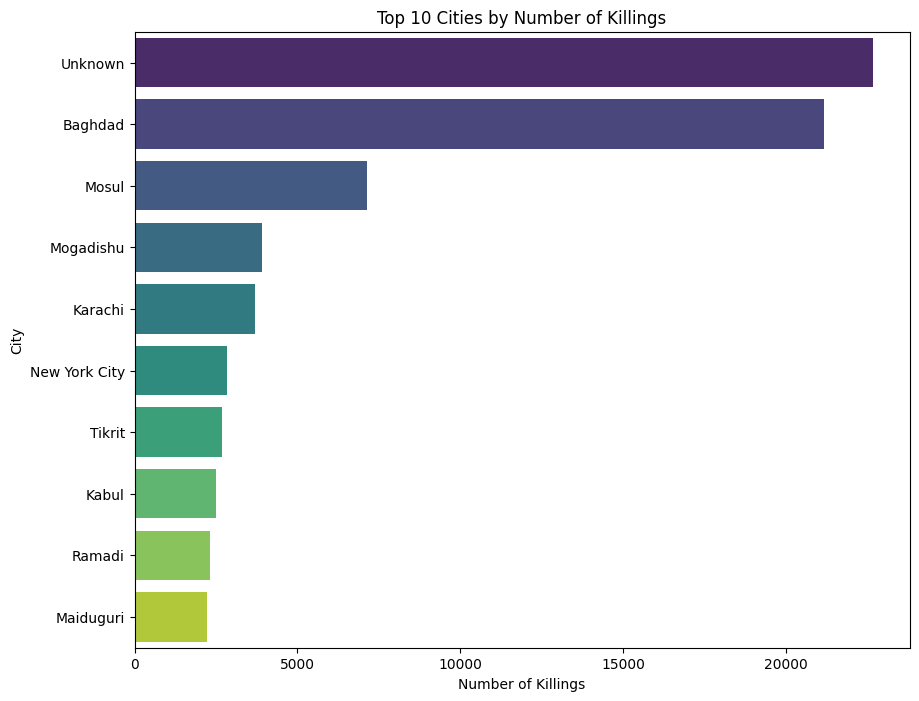

In [27]:
by_city = (data[data['city'] != '']
            .groupby('city')['nkill']
            .sum()
            .reset_index()
            .sort_values(by='nkill', ascending=False)
            .head(10))

plt.figure(figsize=(10, 8))
sns.barplot(data=by_city, x='nkill', y='city', palette='viridis')
plt.title('Top 10 Cities by Number of Killings')
plt.xlabel('Number of Killings')
plt.ylabel('City')
plt.show()

In [28]:
data['nkill'] = pd.to_numeric(data['nkill'], errors='coerce')

by_country = data.groupby('country', as_index=False)['nkill'].sum()

by_country = by_country.sort_values(by='nkill', ascending=False)

print(by_country.head(10))

top_10_countries = by_country.head(10)

         country    nkill
84          Iraq  78589.0
0    Afghanistan  39384.0
134     Pakistan  23822.0
130      Nigeria  22682.0
80         India  19341.0
167    Sri Lanka  15530.0
175        Syria  15229.0
35      Colombia  14698.0
139         Peru  12771.0
52   El Salvador  12053.0


/tmp/ipykernel_57501/351040291.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_country = data.groupby('country', as_index=False)['nkill'].sum()


/tmp/ipykernel_57501/3887322937.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_region, x='nkill', y='region', palette='viridis')


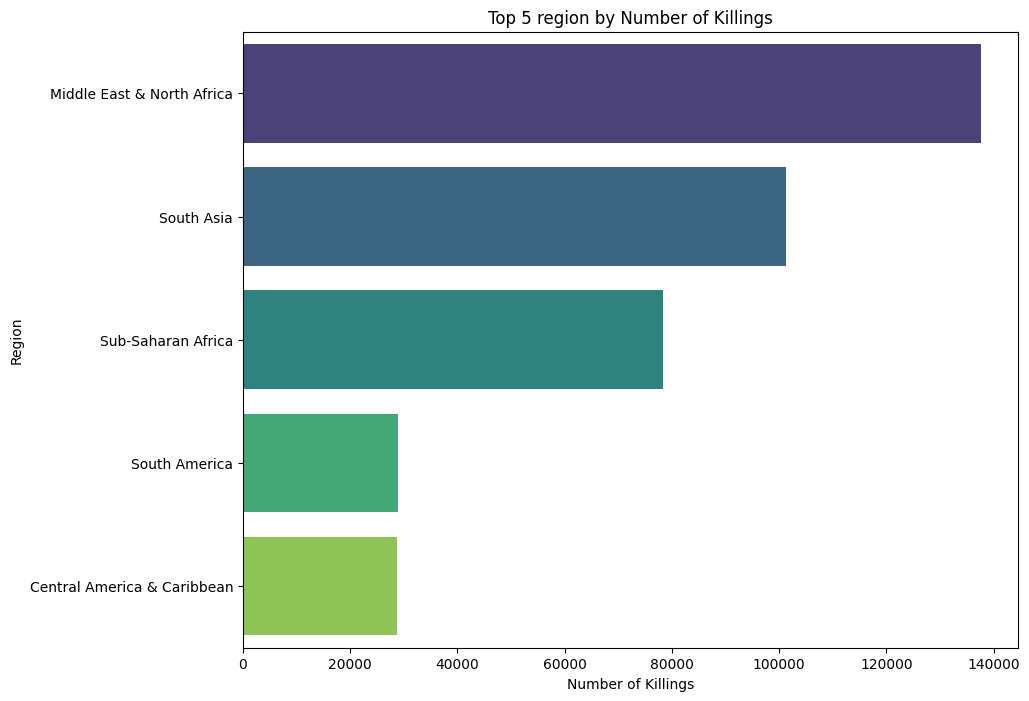

In [29]:
by_region = (data[data['region'] != '']
            .groupby('region')['nkill']
            .sum()
            .reset_index()
            .sort_values(by='nkill', ascending=False)
            .head(5))

plt.figure(figsize=(10, 8))
sns.barplot(data=by_region, x='nkill', y='region', palette='viridis')
plt.title('Top 5 region by Number of Killings')
plt.xlabel('Number of Killings')
plt.ylabel('Region')
plt.show()

damage
Unknown    137472
Low         43304
Medium        909
High            6
Name: count, dtype: int64


/tmp/ipykernel_57501/2578116226.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_damage = (data.groupby('damage')['nkill']
/tmp/ipykernel_57501/2578116226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_damage, y='damage', x='nkill', palette='viridis')


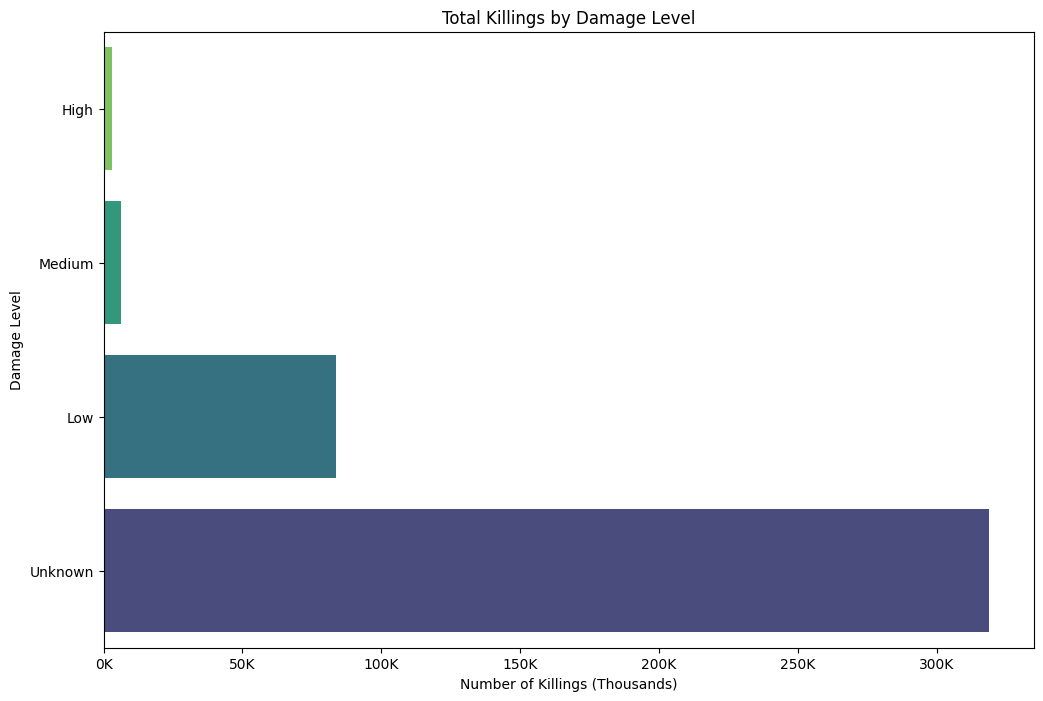

In [30]:
print(data['damage'].value_counts())

damage_order = ['Unknown', 'Low', 'Medium', 'High']
data['damage'] = pd.Categorical(data['damage'], categories=damage_order, ordered=True)

by_damage = (data.groupby('damage')['nkill']
             .sum()
             .reset_index()
             .sort_values(by='nkill', ascending=False))

plt.figure(figsize=(12, 8))
sns.barplot(data=by_damage, y='damage', x='nkill', palette='viridis')
plt.title('Total Killings by Damage Level')
plt.xlabel('Number of Killings (Thousands)')
plt.ylabel('Damage Level')
plt.gca().invert_yaxis()  # Flip the y-axis to match ggplot's coord_flip()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))  # Format x-axis
plt.show()


/tmp/ipykernel_57501/1309286985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_attack = (data.groupby('attack')['nkill']
/tmp/ipykernel_57501/1309286985.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_attack, y='attack', x='nkill', palette='viridis')


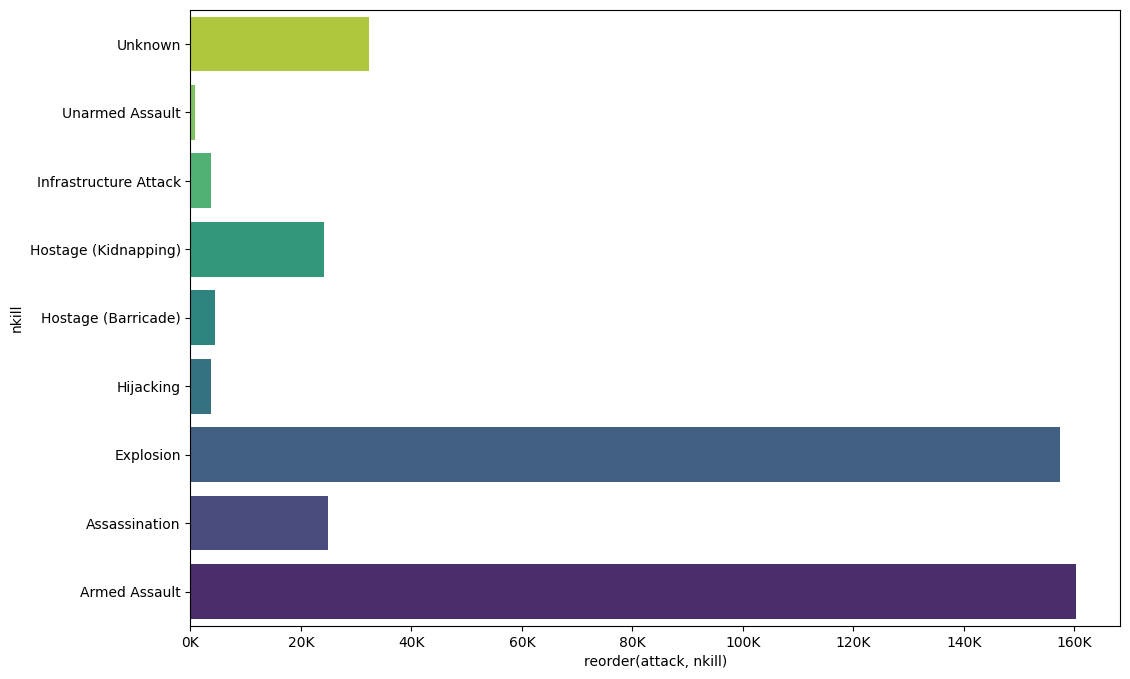

In [31]:
by_attack = (data.groupby('attack')['nkill']
             .sum()
             .reset_index()
             .sort_values(by='nkill', ascending=False))

plt.figure(figsize=(12, 8))
sns.barplot(data=by_attack, y='attack', x='nkill', palette='viridis')
plt.xlabel('reorder(attack, nkill)')
plt.ylabel('nkill')
plt.gca().invert_yaxis()  
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}K')) 
plt.show()


/tmp/ipykernel_57501/3725567011.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_weapon, y='weapon', x='nkill', palette='viridis')


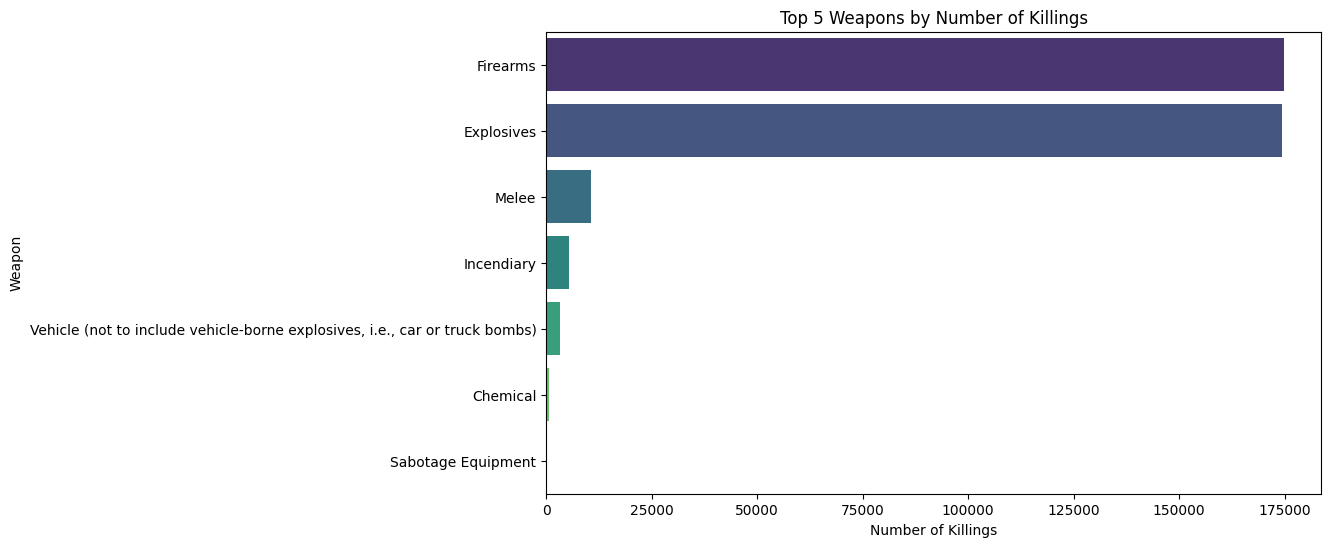

In [32]:
by_weapon = (data[['weapon', 'nkill']]
             .query("weapon != 'Unknown' and weapon != 'Other'")
             .groupby('weapon', as_index=False)['nkill']
             .sum()
             .sort_values(by='nkill', ascending=False)
             .head(7))

plt.figure(figsize=(10, 6))
sns.barplot(data=by_weapon, y='weapon', x='nkill', palette='viridis')
plt.title('Top 5 Weapons by Number of Killings')
plt.xlabel('Number of Killings')
plt.ylabel('Weapon')
plt.show()

/tmp/ipykernel_57501/522880182.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_target, y='target', x='nkill', palette='viridis', hue_order=None, legend=False)


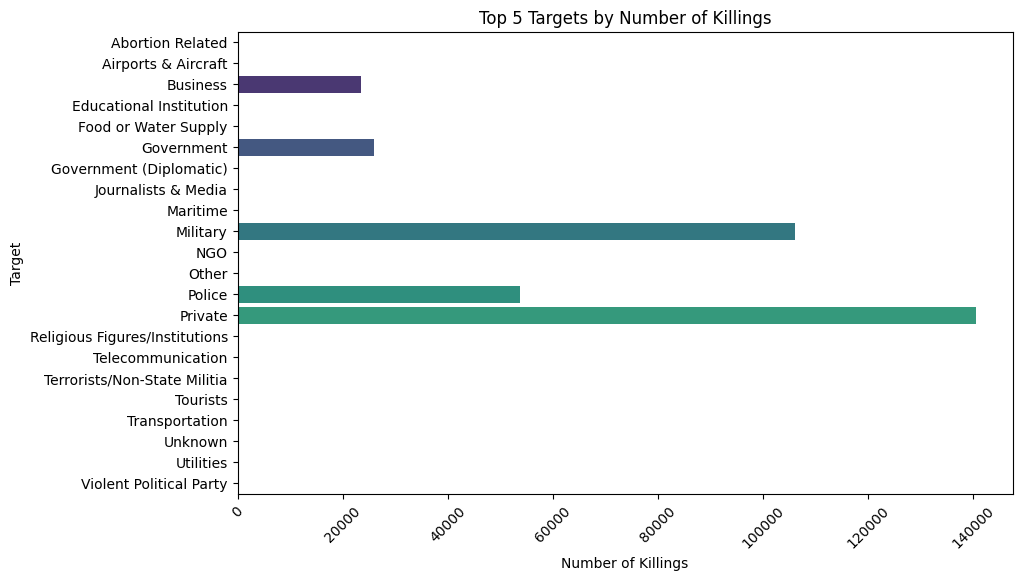

        target     nkill
13     Private  140504.0
9     Military  106047.0
12      Police   53704.0
5   Government   26071.0
2     Business   23487.0


In [33]:
by_target = (data[data['target'] != 'Unknown']
            .groupby('target', observed=True)['nkill'] 
            .sum()
            .reset_index()
            .sort_values(by='nkill', ascending=False)
            .head(5)
            )

plt.figure(figsize=(10, 6))
sns.barplot(data=by_target, y='target', x='nkill', palette='viridis', hue_order=None, legend=False)
plt.title('Top 5 Targets by Number of Killings')
plt.xlabel('Number of Killings')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.show()
print(by_target)

In [34]:
by_gname = (data[data['gname'] != 'Unknown']
           .groupby('gname', observed=False)['nkill']  
           .sum()
           .reset_index()
           .query('nkill > 0') 
           .sort_values(by='nkill', ascending=False)
           .head(10))

print(by_gname)

                                                 gname    nkill
1403                                              ISIL  38923.0
3137                                           Taliban  29410.0
703                                         Boko Haram  20328.0
2946                                 Shining Path (SL)  11601.0
1862           Liberation Tigers of Tamil Eelam (LTTE)  10989.0
176                                         Al-Shabaab   9330.0
161                                           Al-Qaida   8241.0
1119  Farabundo Marti National Liberation Front (FMLN)   8065.0
2274                 Nicaraguan Democratic Force (FDN)   6662.0
3128                                               TTP   6042.0


In [35]:
most_active = by_gname.head(5)['gname'].tolist()

group_targets = (data[data['gname'].isin(most_active)]
                 .groupby(['gname', 'country', 'target'])
                 .agg(nkill=('nkill', 'sum'))
                 .reset_index()
                 .sort_values(['gname', 'nkill'], ascending=[True, False])
                 .groupby('gname')
                 .first()
                 .reset_index())

print(group_targets)

/tmp/ipykernel_57501/1960317773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['gname', 'country', 'target'])
/tmp/ipykernel_57501/1960317773.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('gname')


                                      gname      country            target  \
0                                     1 May  Afghanistan  Abortion Related   
1                                14 K Triad  Afghanistan  Abortion Related   
2                        14 March Coalition  Afghanistan  Abortion Related   
3                  14th of December Command  Afghanistan  Abortion Related   
4       15th of September Liberation Legion  Afghanistan  Abortion Related   
...                                     ...          ...               ...   
3530                            Zulu Miners  Afghanistan  Abortion Related   
3531                     Zuwar al-Imam Rida  Afghanistan  Abortion Related   
3532                              Zviadists  Afghanistan  Abortion Related   
3533                             Zwai Tribe  Afghanistan  Abortion Related   
3534  leftist guerrillas-Bolivarian militia  Afghanistan  Abortion Related   

      nkill  
0       0.0  
1       0.0  
2       0.0  
3      

In [36]:
# Numerical variables

In [37]:
## Descriptive statistics

In [38]:
numerical = ["nperps", "nkill", "nwound", "nkillter", "ransomamt"]
summary = data[numerical].describe()
print(summary)

              nperps          nkill         nwound       nkillter  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean        5.865447       2.266860       2.883296       0.320825   
std       163.300327      11.227057      34.309747       3.346474   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       2.000000       2.000000       0.000000   
max     25000.000000    1570.000000    8191.000000     500.000000   

          ransomamt  
count  1.816910e+05  
mean   2.357266e+04  
std    2.617456e+06  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+09  


In [39]:
## Plots over time

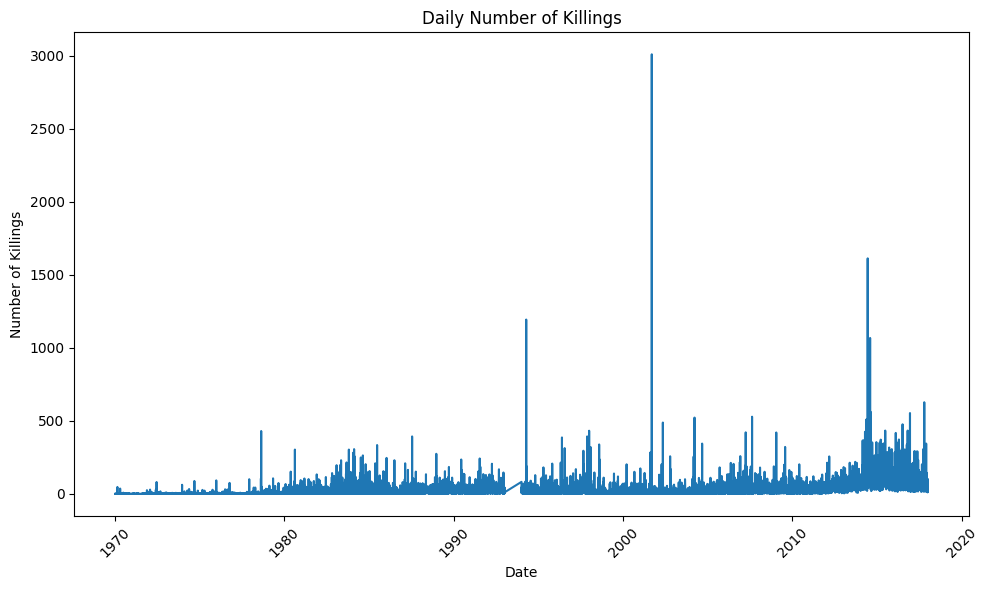

In [40]:
nkill_daily = (data[['date', 'nkill']]
               .fillna({'nkill': 0})
               .assign(nkill=lambda x: x['nkill'].clip(lower=0))
               .groupby('date', as_index=False)
               .sum())

nkill_daily['date'] = pd.to_datetime(nkill_daily['date'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=nkill_daily, x='date', y='nkill')
plt.title('Daily Number of Killings')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

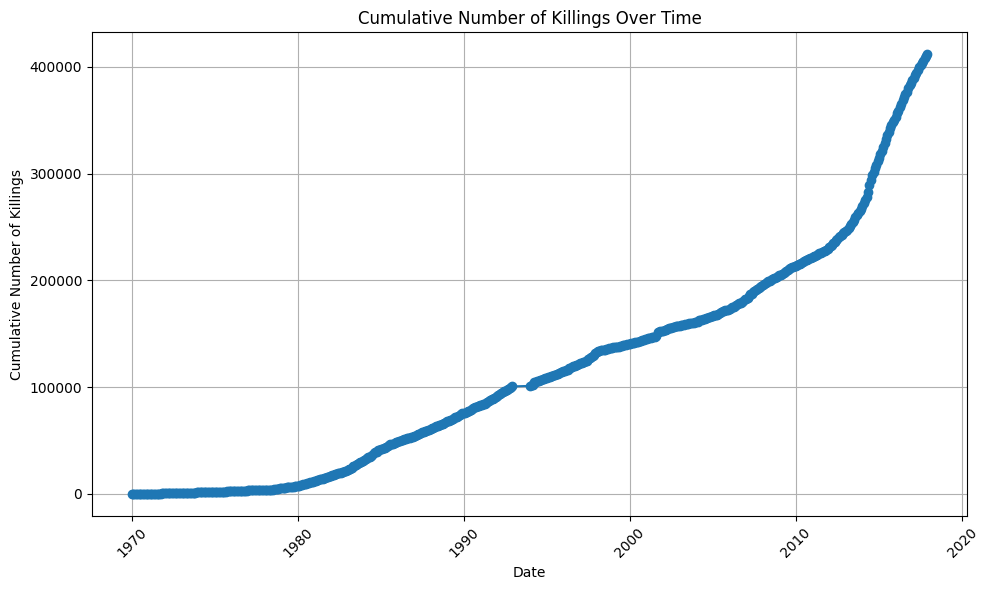

In [41]:
nkill_monthly = (data[['year', 'month', 'nkill']]
                 .fillna({'nkill': 0})
                 .assign(nkill=lambda x: x['nkill'].clip(lower=0))
                 .groupby(['year', 'month'])
                 .agg(nkill=('nkill', 'sum'))
                 .reset_index()
                 .assign(date=lambda x: pd.to_datetime(x[['year', 'month']].assign(day=1)))
                 .sort_values('date')
                 .assign(nkill_cumsum=lambda x: x['nkill'].cumsum())
                 .drop(columns=['year', 'month'])
                 )

plt.figure(figsize=(10, 6))
plt.plot(nkill_monthly['date'], nkill_monthly['nkill_cumsum'], marker='o')
plt.title('Cumulative Number of Killings Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Killings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

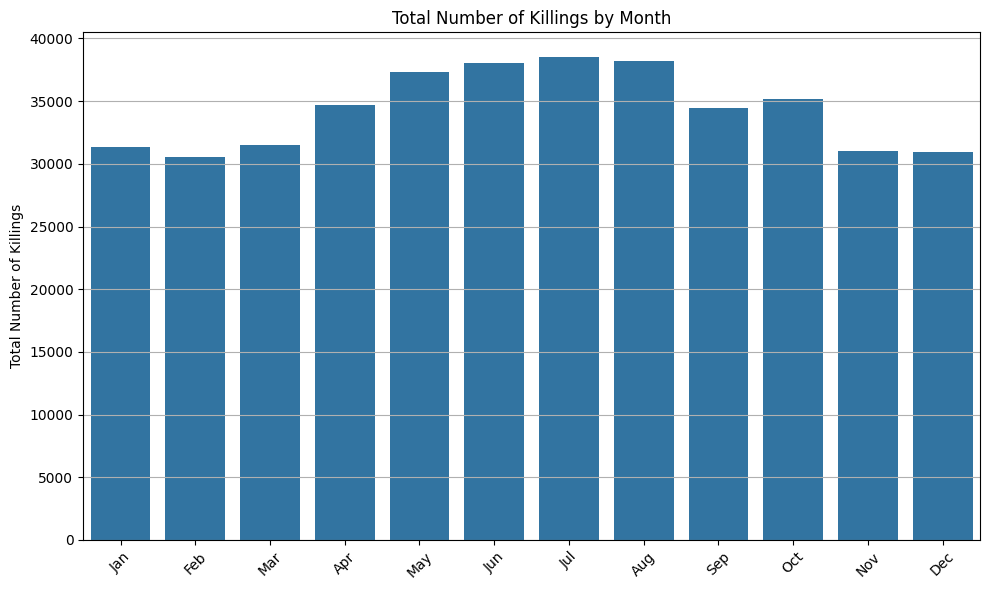

In [42]:
by_month = (data[['month', 'nkill']]
            .groupby('month')
            .agg(nkill=('nkill', 'sum'))
            .reset_index()
            .assign(monthname=lambda x: x['month'].map({
                1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
            }))
            )

plt.figure(figsize=(10, 6))
sns.barplot(data=by_month, x='monthname', y='nkill', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Total Number of Killings by Month')
plt.xlabel('')
plt.ylabel('Total Number of Killings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x1600 with 0 Axes>

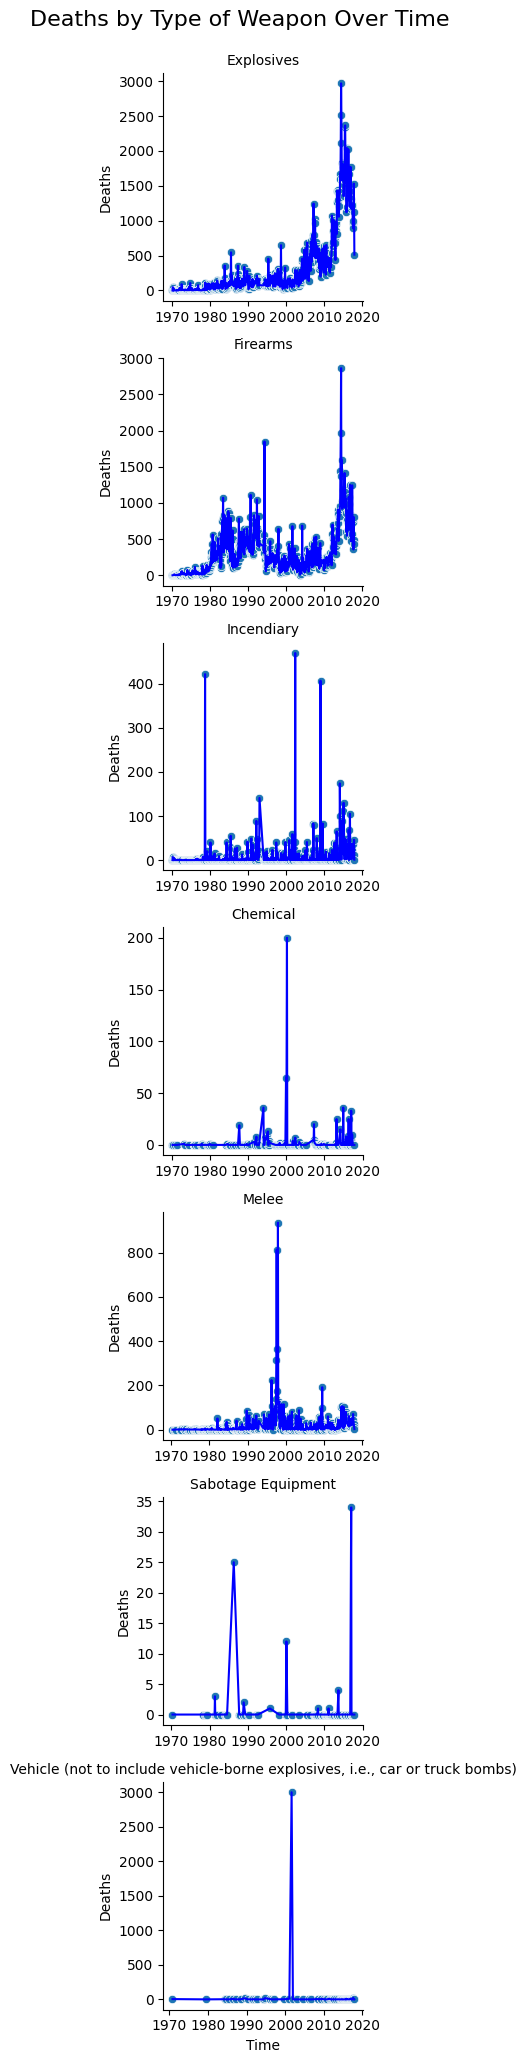

In [43]:
nkill_by_weapon_monthly = (data[['year', 'month', 'nkill', 'weapon']]
                           .query('weapon in @by_weapon.weapon')
                           .groupby(['year', 'month', 'weapon'])
                           .agg(nkill=('nkill', 'sum'))
                           .reset_index()
                           .assign(date=lambda x: pd.to_datetime(x[['year', 'month']].assign(day=1)))
                           .drop(columns=['year', 'month'])
                           )

plt.figure(figsize=(12, 16))

g = sns.FacetGrid(nkill_by_weapon_monthly, col='weapon', col_wrap=1, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='date', y='nkill')
g.map_dataframe(sns.lineplot, x='date', y='nkill', estimator=None, color='blue')
g.set_titles("{col_name}")
g.set_axis_labels("Time", "Deaths")
g.set_titles(col_template="{col_name}")
g.add_legend()
g.fig.suptitle("Deaths by Type of Weapon Over Time", size=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  

g.savefig("img/deaths_by_weapon_over_time.png", dpi=75)

plt.show()

/tmp/ipykernel_57501/3442033915.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'month', 'target'])


<Figure size 1200x1600 with 0 Axes>

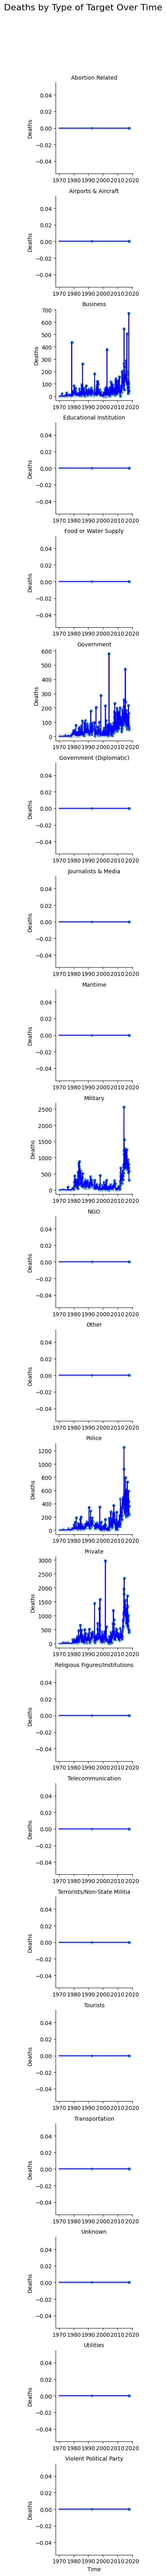

In [44]:
nkill_by_target_monthly = (data[['year', 'month', 'nkill', 'target']]
                           .query('target in @by_target.target')
                           .groupby(['year', 'month', 'target'])
                           .agg(nkill=('nkill', 'sum'))
                           .reset_index()
                           .assign(date=lambda x: pd.to_datetime(x[['year', 'month']].assign(day=1)))
                           .drop(columns=['year', 'month'])
                           )

plt.figure(figsize=(12, 16))

g = sns.FacetGrid(nkill_by_target_monthly, col='target', col_wrap=1, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='date', y='nkill')
g.map_dataframe(sns.lineplot, x='date', y='nkill', estimator=None, color='blue')
g.set_titles("{col_name}")
g.set_axis_labels("Time", "Deaths")
g.set_titles(col_template="{col_name}")
g.add_legend()
g.fig.suptitle("Deaths by Type of Target Over Time", size=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  # Adjust the title position

g.savefig("img/deaths_by_target_over_time.png", dpi=75)

plt.show()

/tmp/ipykernel_57501/4030925686.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'month', 'attack'])


<Figure size 1200x1600 with 0 Axes>

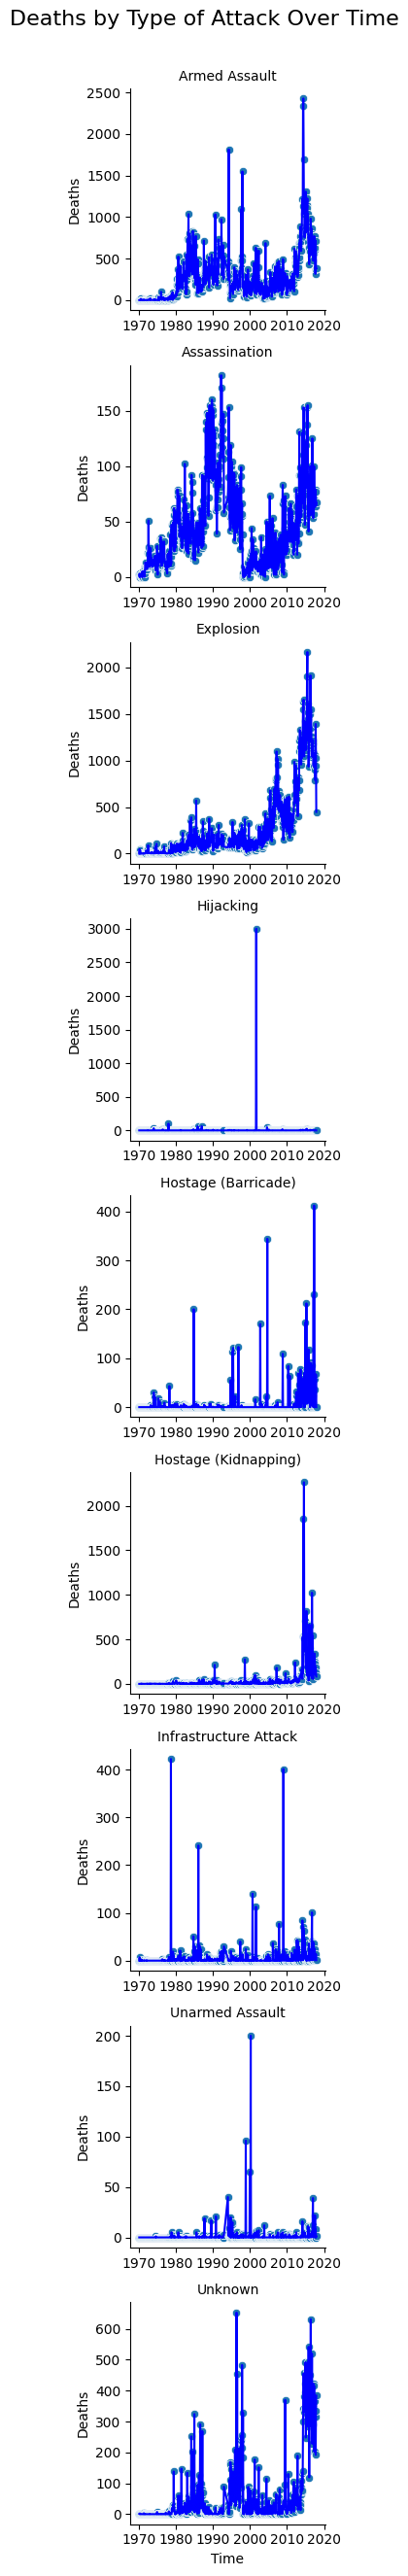

In [45]:
nkill_by_attack_monthly = (data[['year', 'month', 'nkill', 'attack']]
                           .query('attack in @by_attack.attack')
                           .groupby(['year', 'month', 'attack'])
                           .agg(nkill=('nkill', 'sum'))
                           .reset_index()
                           .assign(date=lambda x: pd.to_datetime(x[['year', 'month']].assign(day=1)))
                           .drop(columns=['year', 'month'])
                           )

plt.figure(figsize=(12, 16))

g = sns.FacetGrid(nkill_by_attack_monthly, col='attack', col_wrap=1, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='date', y='nkill')
g.map_dataframe(sns.lineplot, x='date', y='nkill', estimator=None, color='blue')
g.set_titles("{col_name}")
g.set_axis_labels("Time", "Deaths")
g.set_titles(col_template="{col_name}")
g.add_legend()
g.fig.suptitle("Deaths by Type of Attack Over Time", size=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  # Adjust the title position

g.savefig("img/deaths_by_attack_over_time.png", dpi=75)

plt.show()

In [46]:
## Histogram

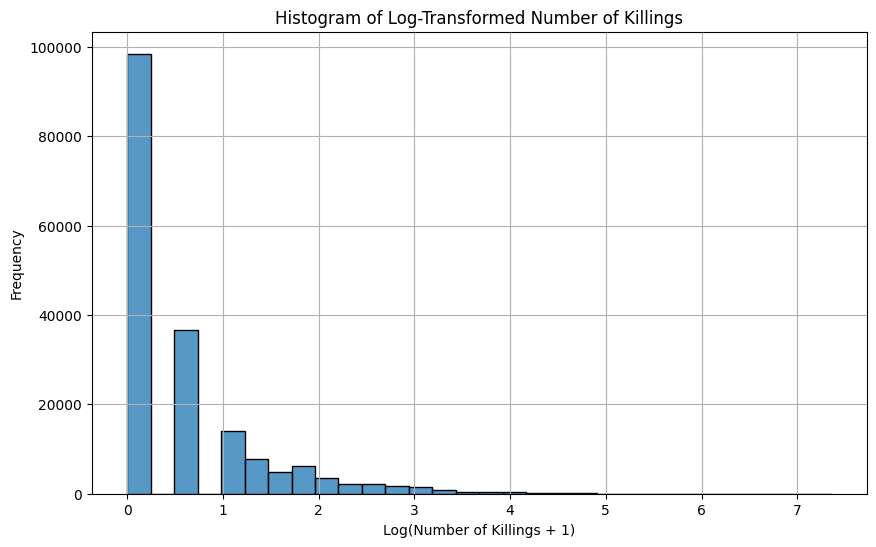

In [47]:
data['log_nkill'] = np.log1p(data['nkill'])

plt.figure(figsize=(10, 6))

sns.histplot(data['log_nkill'], bins=30, kde=False)

plt.title("Histogram of Log-Transformed Number of Killings")
plt.xlabel("Log(Number of Killings + 1)")
plt.ylabel("Frequency")
plt.grid(True)

plt.savefig("img/histogram_log_nkill.png", dpi=75)

plt.show()

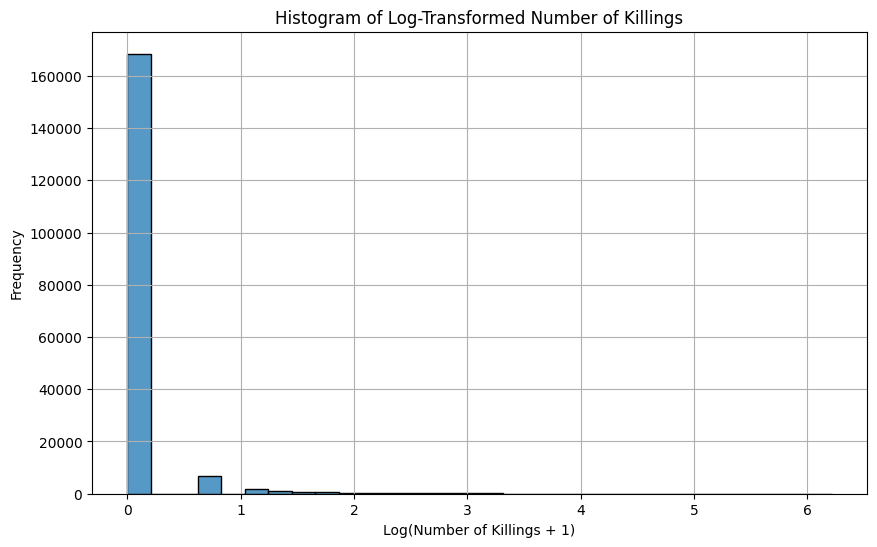

In [48]:
data['log_nkillter'] = np.log1p(data['nkillter'])

plt.figure(figsize=(10, 6))

sns.histplot(data['log_nkillter'], bins=30, kde=False)

plt.title("Histogram of Log-Transformed Number of Killings")
plt.xlabel("Log(Number of Killings + 1)")
plt.ylabel("Frequency")
plt.grid(True)

plt.savefig("img/histogram_log_nkillter.png", dpi=75)

plt.show()

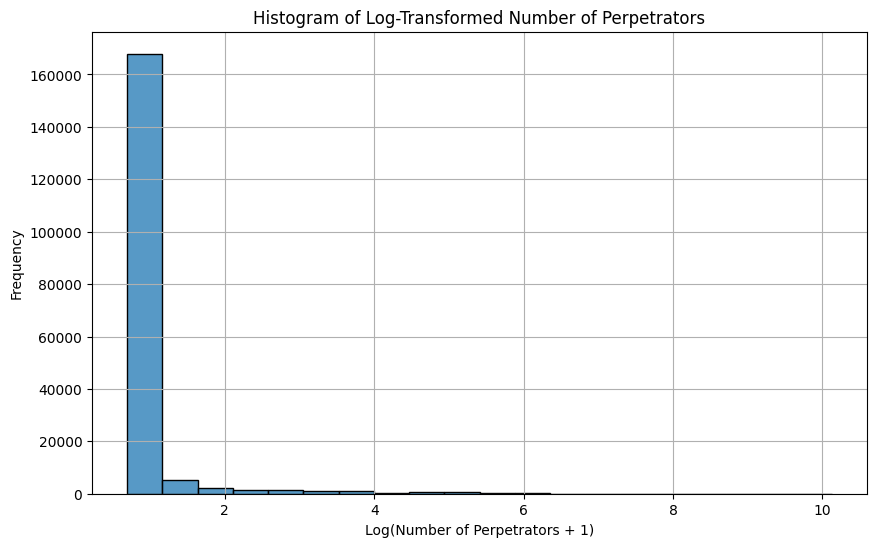

In [49]:
data['log_nperps'] = np.log1p(data['nperps'])

plt.figure(figsize=(10, 6))

sns.histplot(data['log_nperps'], bins=20, kde=False)

plt.title("Histogram of Log-Transformed Number of Perpetrators")
plt.xlabel("Log(Number of Perpetrators + 1)")
plt.ylabel("Frequency")
plt.grid(True)

plt.savefig("img/histogram_log_nperps.png", dpi=75)

plt.show()

In [50]:
# Correlation

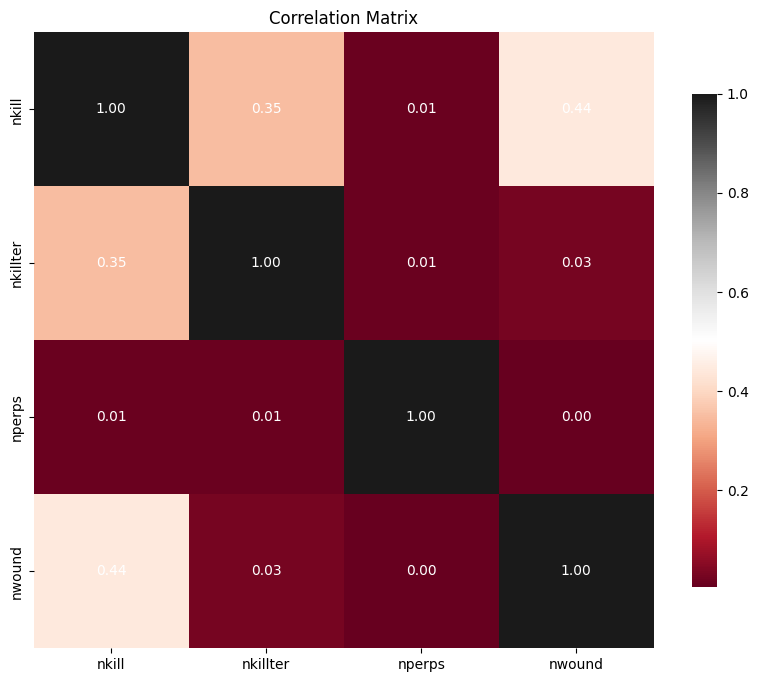

<Figure size 666.667x666.667 with 0 Axes>

In [51]:
C = data[['nkill', 'nkillter', 'nperps', 'nwound']].dropna()

correlation_matrix = C.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="RdGy", fmt=".2f",
            annot_kws={"size": 10, "color": "white"}, cbar_kws={'shrink': .8})

plt.title("Correlation Matrix")
plt.show()

plt.savefig("img/correlation_matrix.png", dpi=75)

In [53]:
# geo

In [54]:
most_active = by_gname['gname'].head(5).tolist()

attacks = data[
    (data['gname'].isin(most_active)) &
    (data['lat'].notna()) &
    (data['long'].notna())
][['year', 'month', 'day', 'lat', 'long', 'gname', 'country', 'nkill']]

print(attacks.head)

<bound method NDFrame.head of         year  month  day        lat       long  \
3141    1975      7   27   9.666399  80.020477   
6648    1978      8   24 -13.152712 -74.218628   
7445    1979      1   25 -12.825945 -74.111516   
7512    1979      2    1   9.666399  80.020477   
7889    1979      3   22   9.814937  80.166080   
...      ...    ...  ...        ...        ...   
181671  2017     12   31  34.031331  44.070106   
181674  2017     12   31  36.045059  41.716717   
181676  2017     12   31  34.217806  69.109316   
181679  2017     12   31  33.953167  44.921906   
181683  2017     12   31  35.315467  64.815508   

                                          gname      country  nkill  
3141    Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka    1.0  
6648                          Shining Path (SL)         Peru    0.0  
7445                          Shining Path (SL)         Peru    5.0  
7512    Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka    1.0  
7889    Liberation 

In [55]:
location = (attacks
            .groupby(['gname', 'country'])
            .agg({
                'nkill': 'sum',
                'lat': 'mean',
                'long': 'mean'
            })
            .reset_index()
            .groupby('gname')
            .apply(lambda x: x.loc[x['nkill'].idxmax()])
            .reset_index(drop=True))

# Rename specific values in the full_gname column
location['full_gname'] = location['gname']
location['full_gname'] = location['full_gname'].replace({
    'ISIL': 'Islamic State of Iraq and the Levant',
    'TTP': 'Tehrik-i-Taliban Pakistan'
})

location['full_gname_ctry'] = location['full_gname'] + ', ' + location['country']

print(location.head())

/tmp/ipykernel_57501/2108818151.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['gname', 'country'])
/tmp/ipykernel_57501/2108818151.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('gname')


                                 gname      country  nkill  lat  long  \
0                                1 May  Afghanistan    0.0  NaN   NaN   
1                           14 K Triad  Afghanistan    0.0  NaN   NaN   
2                   14 March Coalition  Afghanistan    0.0  NaN   NaN   
3             14th of December Command  Afghanistan    0.0  NaN   NaN   
4  15th of September Liberation Legion  Afghanistan    0.0  NaN   NaN   

                            full_gname  \
0                                1 May   
1                           14 K Triad   
2                   14 March Coalition   
3             14th of December Command   
4  15th of September Liberation Legion   

                                    full_gname_ctry  
0                                1 May, Afghanistan  
1                           14 K Triad, Afghanistan  
2                   14 March Coalition, Afghanistan  
3             14th of December Command, Afghanistan  
4  15th of September Liberation Legion

/tmp/ipykernel_57501/2108818151.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['nkill'].idxmax()])
